![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow as tf

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [3]:
import os
project_path = '/content/ACV2_project'
os.chdir(project_path)

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
dataset_path = '/content/ACV2_project/ACV-Project-2 Datatset/Aligned Face Dataset.zip'
weights_path = '/content/ACV2_project/ACV-Project-2 Datatset/vgg_face_weights.h5'

In [7]:
from zipfile import ZipFile

with ZipFile(dataset_path, 'r') as z:
  z.extractall();

In [8]:
len(os.listdir('/content/ACV2_project/PINS'))

100

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [9]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [10]:
metadata

array([PINS/pins_Krysten Ritter/Krysten Ritter167_39.jpg,
       PINS/pins_Krysten Ritter/Krysten Ritter163_66.jpg,
       PINS/pins_Krysten Ritter/Krysten Ritter12_30.jpg, ...,
       PINS/pins_zendaya/zendaya84.jpg, PINS/pins_zendaya/zendaya97.jpg,
       PINS/pins_zendaya/zendaya106.jpg], dtype=object)

In [11]:
metadata.shape

(10770,)

### Define function to load image
- Define a function to load image from the metadata

In [12]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [13]:
import cv2
import matplotlib.pyplot as plt

Shape of sample face: (299, 299, 3)


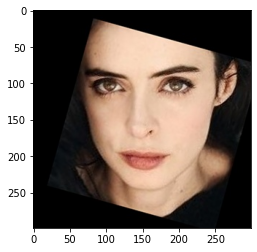

In [14]:
sample_face = load_image(metadata[2].image_path())
plt.imshow(sample_face)
print(f'Shape of sample face: {sample_face.shape}')

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [16]:
model = vgg_face()
model.load_weights(weights_path)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [18]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [19]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [20]:
from tqdm import tqdm

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  image = load_image(m.image_path())
  image = cv2.resize(image, dsize = (224,224))
  image = (image /255.).astype(np.float32)

  # obtain embedding vector for image
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis=0))[0]

In [ ]:
embeddings.shape

(10770, 2622)

In [ ]:
embeddings

array([[ 0.03167586, -0.01503999, -0.01242178, ...,  0.00045118,
         0.0021955 , -0.00906325],
       [ 0.03498866, -0.0010478 , -0.01251992, ..., -0.01050456,
         0.00179532,  0.02442422],
       [ 0.02793152, -0.0011462 , -0.01266937, ..., -0.00904519,
        -0.00578317,  0.02124161],
       ...,
       [ 0.009684  ,  0.00361548, -0.01350803, ..., -0.01429788,
         0.01901418,  0.03894573],
       [ 0.00236187,  0.00097836, -0.00546995, ..., -0.01600438,
         0.01050684,  0.03674654],
       [ 0.01778471,  0.01069116,  0.01986551, ..., -0.02620803,
         0.03290178,  0.04875887]])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

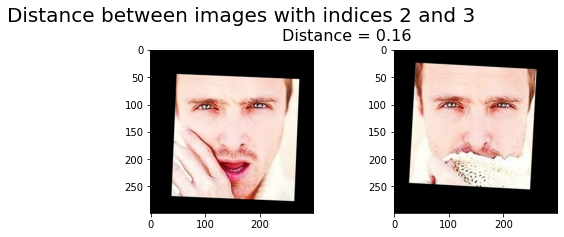

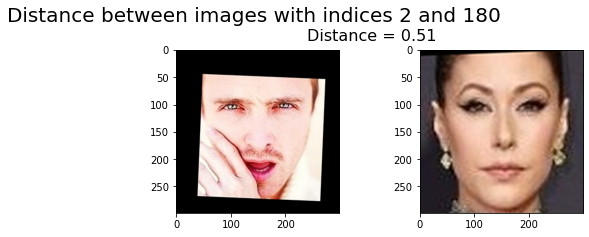

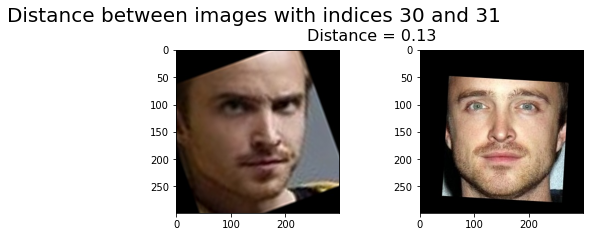

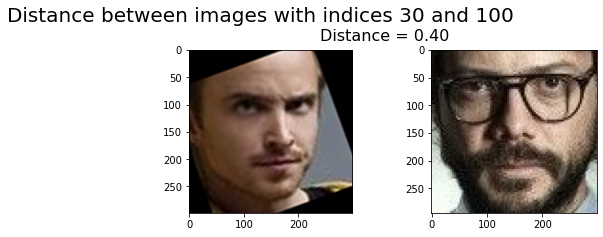

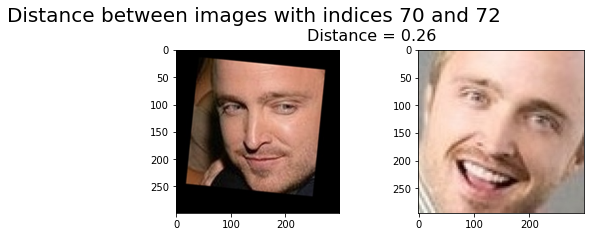

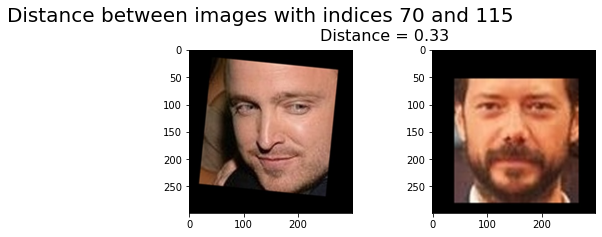

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}\n', fontsize=16)
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    
    plt.title(f'Distance between images with indices {idx1} and {idx2}\n', fontsize=20, ha='right')

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()
le_encoder.fit(targets)
y_train = le_encoder.transform(y_train)
y_test = le_encoder.transform(y_test)

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 2.53779766, -0.06048567, -1.45912263, ...,  0.37084871,
        -0.39000318,  0.84146395],
       [ 1.79801868, -0.06883501, -1.47331816, ...,  0.50828009,
        -1.10547304,  0.59693715],
       [ 0.44233956, -0.40169185, -0.4202994 , ...,  0.81872871,
        -1.11750599,  0.17584119],
       ...,
       [-0.11481158,  0.33518452, -1.55297885, ...,  0.01362689,
         1.23559203,  1.95718372],
       [-0.88236761,  0.11143002, -0.78947314, ..., -0.14707556,
         0.43243254,  1.78821491],
       [ 0.73436016,  0.93554191,  1.61704444, ..., -1.10796644,
         2.54669049,  2.71114959]])

In [ ]:
X_train_scaled.shape

(9573, 2622)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
X_train_pca

array([[-1.40042371e+01,  1.76603112e+01, -1.27507122e+01, ...,
         1.94132646e-01, -6.63219897e-01,  4.15266628e-01],
       [-6.46595848e+00,  1.72418138e+01, -9.33938339e+00, ...,
         1.35143046e-01, -1.25371383e+00,  1.41245515e-01],
       [-1.80006850e+01,  5.98906967e+00, -3.87263628e+00, ...,
        -8.33750846e-01, -2.63670733e+00, -3.34619624e+00],
       ...,
       [ 2.07685036e+01, -2.14331556e+01, -1.80987151e+01, ...,
        -1.20404870e+00, -6.78678992e-01,  1.09554367e+00],
       [ 1.69079552e+01, -2.17245819e+01, -1.28359403e+01, ...,
        -2.57778300e-01, -1.79552636e-01,  9.54065252e-03],
       [ 3.81866697e+01, -1.81979631e+01,  2.87183106e+00, ...,
        -9.01325740e-01, -7.04453999e-01, -3.66328394e-01]])

In [ ]:
X_train_pca.shape

(9573, 128)

- The above PCA chart shows that 128 principal components explains about 87% of the total variance of data.
- If more components are considered we would get a higher explaination of variance.

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', probability=True)
svc.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

def predict_face(idx):
  example_idx = idx

  example_image = load_image(metadata[test_idx][example_idx].image_path())
  X_test_scaled = scaler.transform(X_test)
  X_test_pca = pca.transform(X_test_scaled)
  example_prediction = svc.predict([X_test_pca[example_idx]])
  example_identity = le_encoder.inverse_transform(example_prediction)[0]

  example_identity = le_encoder.inverse_transform(example_prediction)[0]

  plt.figure()
  plt.imshow(example_image)
  plt.suptitle(f"Image actually of '{metadata[test_idx][example_idx].name}'\n");
  plt.title(f"Identified as '{example_identity}' in prediction");

In [ ]:
metadata[test_idx].shape

(1197,)

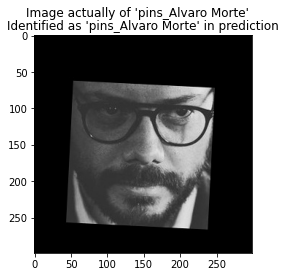

In [ ]:
predict_face(10)